In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
'''
The GroupLens Research Project is a research group in the Department of Computer Science and Engineering in the University of Minnesota. The researchers of this group are involved in many research projects related to the fields of information filtering, collaborative filtering, and recommender systems. Here, we ask you to perform the analysis using the Exploratory Data Analysis technique. 
The details of these projects and the scope of each project are listed in the sections below.
	Data acquisition of the movielens dataset
•	users dataset
•	rating dataset
•	movies dataset
	Perform the Exploratory Data Analysis (EDA) for the users dataset
•	Visualize user age distribution --- Histogram of Age column
•	Visualize overall rating by users --- Visualize it using pie,bar
•	Find and visualize the user rating of the movie “Toy Story (1995)”
•	Find and visualize the viewership of the movie “Toy Story (1995)” by age group
•	Find and visualize the top 25 movies by viewership rating
•	Find the rating for a particular user of user id = 2696
o	Visualize the rating data by user of user id = 2696
	Perform machine learning on first 500 extracted records (hint: use head(500))
•	Use the following features:
o	movie id
o	age
o	occupation
	Use rating as label
	Create train and test data set and perform the following:
•	Create Model
•	Check for Generalization 
•	Deploy model (Show user input)
'''

'\nThe GroupLens Research Project is a research group in the Department of Computer Science and Engineering in the University of Minnesota. The researchers of this group are involved in many research projects related to the fields of information filtering, collaborative filtering, and recommender systems. Here, we ask you to perform the analysis using the Exploratory Data Analysis technique. \nThe details of these projects and the scope of each project are listed in the sections below.\n\uf0d8\tData acquisition of the movielens dataset\n•\tusers dataset\n•\trating dataset\n•\tmovies dataset\n\uf0d8\tPerform the Exploratory Data Analysis (EDA) for the users dataset\n•\tVisualize user age distribution --- Histogram of Age column\n•\tVisualize overall rating by users --- Visualize it using pie,bar\n•\tFind and visualize the user rating of the movie “Toy Story (1995)”\n•\tFind and visualize the viewership of the movie “Toy Story (1995)” by age group\n•\tFind and visualize the top 25 movies

In [44]:
#Load data
movies = pd.read_csv("Data/movies.dat", sep='::' , header=None, names =['MovieID','Title','Genres'] , engine='python')
ratings = pd.read_csv("Data/ratings.dat" , sep='::' , header=None, names =['UserID','MovieID','Rating','Timestamp'] , engine='python')
users = pd.read_csv("Data/users.dat", sep='::' , header=None, names =['UserID','Gender','Age','Occupation','Zip-code'] , engine='python' )

In [45]:
#Merge Dataset
tempDataset = pd.merge(movies,ratings, on='MovieID')
finalDF = pd.merge(tempDataset,users, on='UserID')
finalDF.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [27]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
MovieId      3883 non-null int64
MovieName    3883 non-null object
Geners       3883 non-null object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [28]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
UserId       1000209 non-null int64
MovieId      1000209 non-null int64
Ratings      1000209 non-null int64
TimeStamp    1000209 non-null int64
dtypes: int64(4)
memory usage: 30.5 MB


In [49]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
UserID        6040 non-null int64
Gender        6040 non-null object
Age           6040 non-null int64
Occupation    6040 non-null int64
Zip-code      6040 non-null object
dtypes: int64(3), object(2)
memory usage: 236.0+ KB


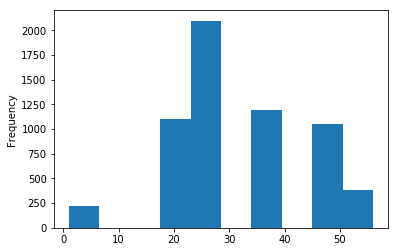

In [50]:
#Visualize user age distribution --- Histogram of Age column
users.Age.plot(kind="hist")

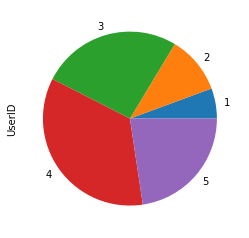

In [51]:
#Visualize overall rating by users --- Visualize it using pie,bar

ratings.groupby("Rating")['UserID'].count().plot(kind='pie')

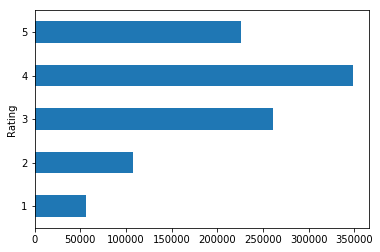

In [52]:
finalDF.groupby('Rating')['UserID'].count().plot(kind='barh')

Rating
1     16
2     61
3    345
4    835
5    820
Name: UserID, dtype: int64


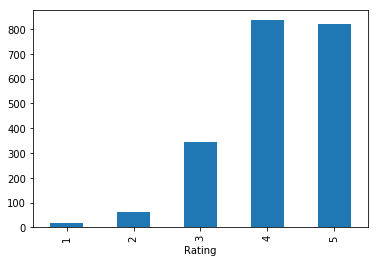

In [63]:
#Find and visualize the user rating of the movie “Toy Story (1995)”
print(finalDF[finalDF.Title == 'Toy Story (1995)'].groupby('Rating')['UserID'].count())
finalDF[finalDF.Title == 'Toy Story (1995)'].groupby('Rating')['UserID'].count().plot(kind='bar')

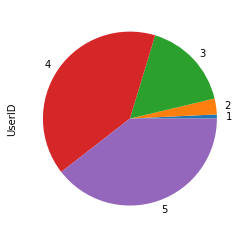

In [64]:
finalDF[finalDF.Title == 'Toy Story (1995)'].groupby('Rating')['UserID'].count().plot(kind='pie')

Age
1     112
18    448
25    790
35    423
45    143
50    108
56     53
Name: UserID, dtype: int64


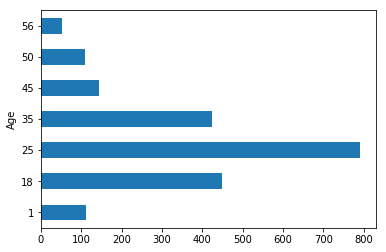

In [65]:
# •	Find and visualize the viewership of the movie “Toy Story (1995)” by age group
print(finalDF[finalDF.Title == 'Toy Story (1995)'].groupby('Age')['UserID'].count())
finalDF[finalDF.Title == 'Toy Story (1995)'].groupby('Age')['UserID'].count().plot(kind='barh')

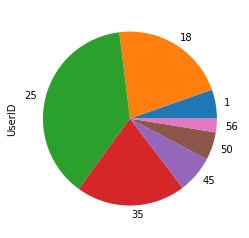

In [66]:
finalDF[finalDF.Title == 'Toy Story (1995)'].groupby('Age')['UserID'].count().plot(kind='pie')

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

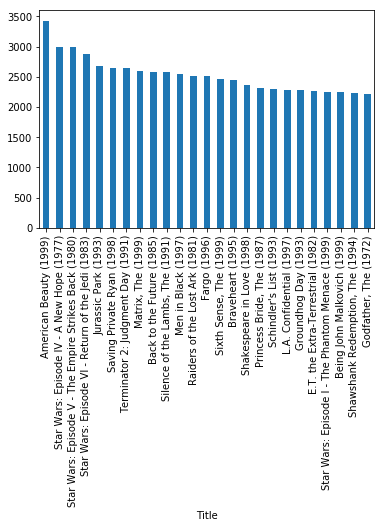

In [70]:
#•	Find and visualize the top 25 movies by viewership rating
print(finalDF.groupby('Title').Rating.count().nlargest(25))
finalDF.groupby('Title').Rating.count().nlargest(25).plot(kind='bar')

Rating
1     2
2     3
3     3
4    11
5     1
Name: MovieID, dtype: int64


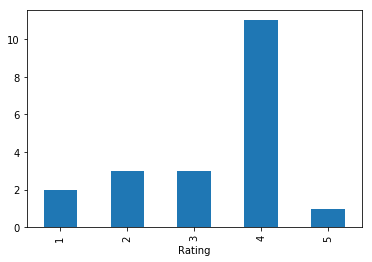

In [72]:
# •	Find the rating for a particular user of user id = 2696
print(finalDF[finalDF.UserID == 2696].groupby('Rating')['MovieID'].count())
finalDF[finalDF.UserID == 2696].groupby('Rating')['MovieID'].count().plot(kind='bar')

In [73]:
#ML Part
mlData = finalDF.head(500)
mlData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 10 columns):
MovieID       500 non-null int64
Title         500 non-null object
Genres        500 non-null object
UserID        500 non-null int64
Rating        500 non-null int64
Timestamp     500 non-null int64
Gender        500 non-null object
Age           500 non-null int64
Occupation    500 non-null int64
Zip-code      500 non-null object
dtypes: int64(6), object(4)
memory usage: 43.0+ KB


In [74]:
features = mlData.iloc[:,[0,7,8]].values
label = mlData.iloc[:,4].values

In [75]:
# Multiclass Classification 
# K-NN
#Create Train Test Split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

for i in range(1,501):
    X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size = 0.2,
                                                random_state=i)
   
    model = KNeighborsClassifier(n_neighbors=17)
    model.fit(X_train,y_train)
    training_score = model.score(X_train,y_train)
    testing_score = model.score(X_test,y_test)
    
    #Only Generalized model will be outputted
    if testing_score > training_score:
        print("Training Score {} Testing Score {} for Random State {}".format(training_score,testing_score,i))

Training Score 0.405 Testing Score 0.42 for Random State 82
Training Score 0.4025 Testing Score 0.42 for Random State 104
Training Score 0.4225 Testing Score 0.45 for Random State 145
Training Score 0.41 Testing Score 0.43 for Random State 158
Training Score 0.415 Testing Score 0.42 for Random State 271
Training Score 0.395 Testing Score 0.41 for Random State 283
Training Score 0.405 Testing Score 0.41 for Random State 291
Training Score 0.3825 Testing Score 0.43 for Random State 460


In [84]:
#Create final model based on the discovered k value
#Identify which k value gives generalized

X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size = 0.2,
                                                random_state=145)

finalModel = KNeighborsClassifier(n_neighbors=17)
finalModel.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=17, p=2,
           weights='uniform')

In [85]:
#Training Score Score
finalModel.score(X_train,y_train)

0.4225

In [86]:
#Test Score
finalModel.score(X_test,y_test)

0.45

In [87]:
#Model Deployment
import pickle
pickle.dump(finalModel, open("MovieLens.model" , "wb"))